In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits

In [4]:
df=load_digits()
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
df.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [13]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
df.data=MM.fit_transform(df.data)

In [15]:
df.data

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

1.svm
2.RandomForestClassifier
3.LogisticRegression
4.MultinomialNB
5.GaussianNB
6.DecisionTressClassifier

In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [21]:
model_para={
    "SVM":{
        "model":SVC(),
        "params":{
            "C":[1,10,20,30],
            "kernel":["linear","rbf"],
            "gamma":["auto","scale"]
        }
    },
    "Logistic_Regression":{
        "model":LogisticRegression(multi_class="auto",solver="liblinear"),
        "params":{
            "C":[1,10,20]
        }
    },
    "Random_Forest":{
        "model":RandomForestClassifier(),
        "params":{
            "criterion":["gini","entropy","log_loss"],
            "n_estimators":[1,50,100]
        }
    },
    "Multinomial":{
        "model": MultinomialNB(),
        "params":{
        }
    },
    "Gaussian":{
        "model":GaussianNB(),
        "params":{
        }
    },
    "DecisionTree":{
        "model":DecisionTreeClassifier(),
        "params":{
            "criterion":["gini","entropy","log_loss"],
            "splitter":["best","random"]
        }
    }
}

In [22]:
Result_score=[]
from sklearn.model_selection import GridSearchCV
for model_name,model_itr in model_para.items():
  clf=GridSearchCV(model_itr["model"],model_itr["params"],cv=5)
  clf.fit(df.data,df.target)
  Result_score.append({
      "model":model_name,
      "Best_score":clf.best_score_,
      "Best Parameters":clf.best_params_
  })

Result=pd.DataFrame(Result_score)
Result

,model,Best_score,Best Parameters
0,SVM,0.974963,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
1,Logistic_Regression,0.928776,{'C': 1}
2,Random_Forest,0.938805,"{'criterion': 'gini', 'n_estimators': 50}"
3,Multinomial,0.874245,{}
4,Gaussian,0.796905,{}
5,DecisionTree,0.816945,"{'criterion': 'log_loss', 'splitter': 'best'}"


SVM is the best model for digits dataset

In [33]:
from sklearn.model_selection import train_test_split
data=pd.DataFrame(df.data)
data["target"]=pd.DataFrame(df.target)

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(data.drop(["target"],axis=1),data.target,test_size=0.2,random_state=2)


In [36]:
model=SVC(C=10,gamma="scale",kernel="rbf")
model.fit(X_train,Y_train)

SVC(C=10)

In [37]:
model.score(X_test,Y_test)

0.9777777777777777

In [39]:
Y_predicted=model.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(Y_test,Y_predicted)

Text(50.722222222222214, 0.5, 'Y_predicted')

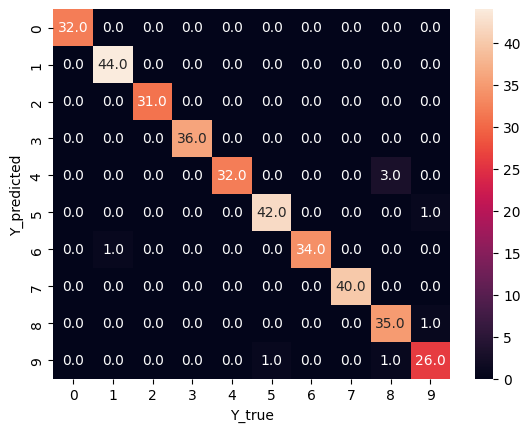

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(CM,annot=True,fmt=".1f")
plt.xlabel("Y_true")
plt.ylabel("Y_predicted")